In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rdkit.Chem import Draw
from rdkit import Chem
from scipy.stats import kendalltau, spearmanr

In [ ]:
import numpy as np
import glob as glob
import matplotlib.pyplot as plt

# Read all the ts_sali matrices
ts_sali_files = glob.glob('plots/*ts_sali.npy')

# Create a histogram for the matrices values
for file in ts_sali_files:
    ts_sali = np.load(file)
    plt.hist(ts_sali.flatten(), bins=100)
    #plt.title(file)
    plt.xlabel('TS SALI')
    plt.ylabel('Number of occurrences')
    plt.tight_layout()
    plt.savefig(f'plots/{file.split("/")[-1].split(".")[0]}_hist.png')
    
    # Clear the plot
    plt.clf()

/tmp/ipykernel_5316/2056384015.py:56: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(14)
/tmp/ipykernel_5316/2056384015.py:59: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(14)


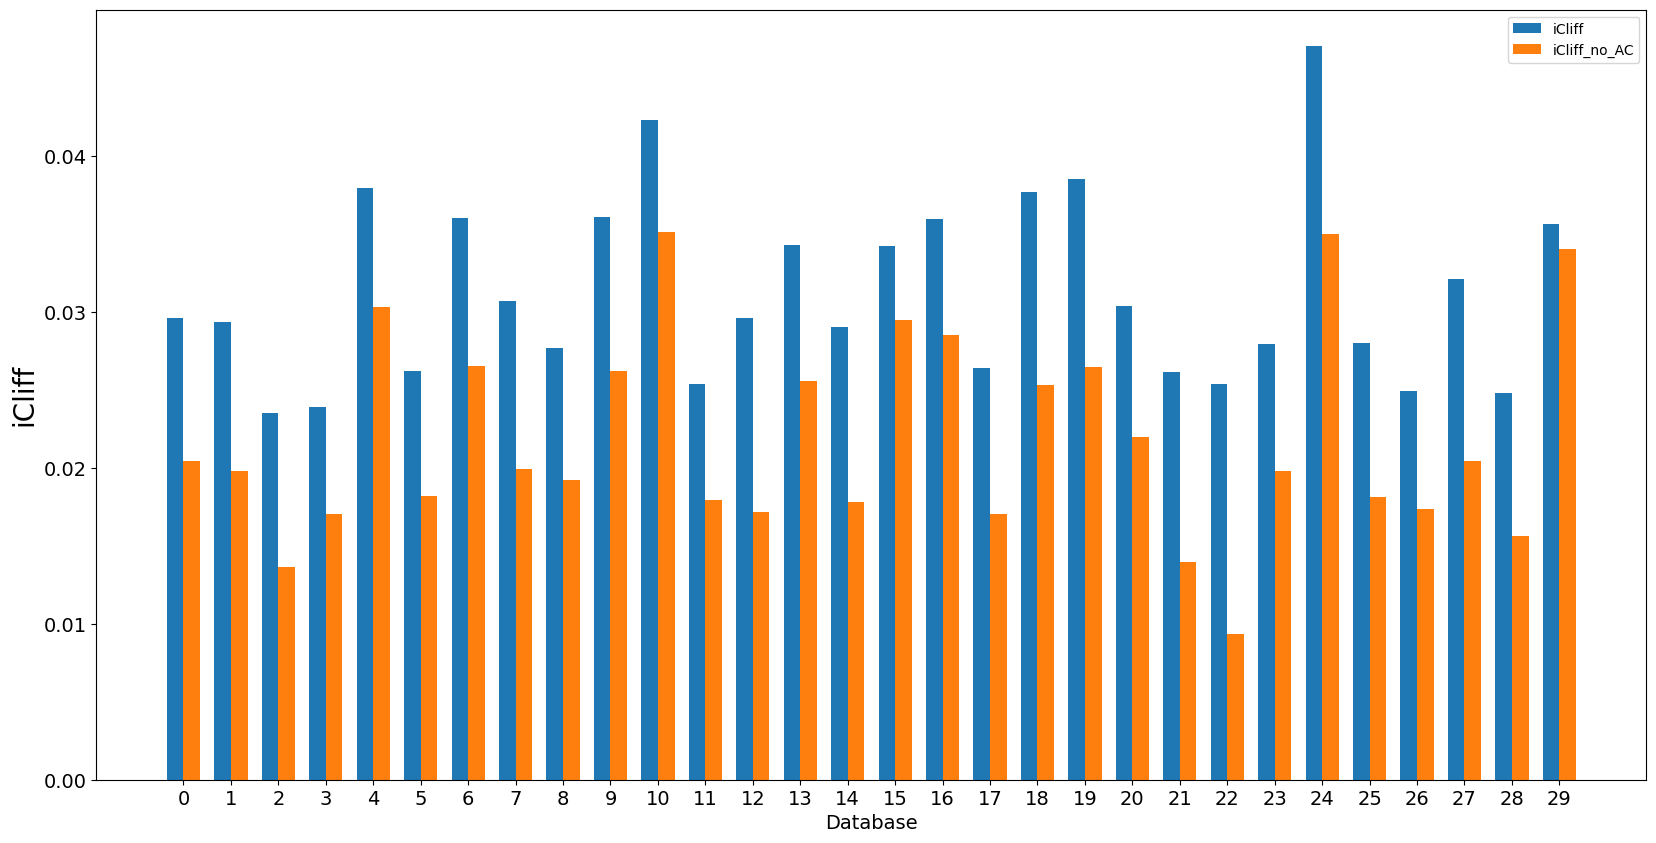

In [24]:
# Plot the cahnge before and after removing ACs
# Read the data
df = pd.read_csv('iCliff_francesca.csv')

# Read the database order and the order of the molecules in the df
order = pd.read_csv('database_order.csv')

# Order the molecules in df according to the database order
df = df.set_index('name')
df = df.reindex(order['database'])
df = df.reset_index()

# For each database do a bar plot of the change in the iCliff and iCliff_no_AC. All databases in one plot. Anotate the 
# number of molecules in each database n and n_no_AC over the bars.

# Get the databases
databases = df['database']

# Get the iCliff and iCliff_no_AC
iCliff = df['iCliff']
iCliff_no_AC = df['iCliff_no_AC']

# Get the number of molecules in each database
n = df['n']
n_no_AC = df['n_no_AC']

# Get the number of databases
n_databases = len(databases.unique())

# Do the plot
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

# Get the width of the bars
width = 0.35

# Get the x locations
x = np.arange(n_databases)

# Plot the bars
rects1 = ax.bar(x - width/2, iCliff, width, label='iCliff')
rects2 = ax.bar(x + width/2, iCliff_no_AC, width, label='iCliff_no_AC')

# Anotate the number of molecules in each database
#for i in range(n_databases):
#    ax.annotate(f'{n[i]}', (x[i] - width/2, iCliff[i]), textcoords="offset points", xytext=(0, 10), ha='center', size=6)
#    ax.annotate(f'{n_no_AC[i]}', (x[i] + width/2, iCliff_no_AC[i]), textcoords="offset points", xytext=(0, 10), ha='center', size=6)

# Set the labels
ax.set_ylabel('iCliff', size=20)
ax.set_xlabel('Database', size=14)
ax.set_xticks(range(n_databases))
ax.set_xticklabels(range(n_databases))

# Make tick labels larger
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
ax.legend()

plt.show()

In [2]:
# Read the data
data = pd.read_csv('iCliff_ts_sali.csv')
print(data.columns)

Index(['name', 'fp', 'iCliff', 'ts_sali_avg'], dtype='object')


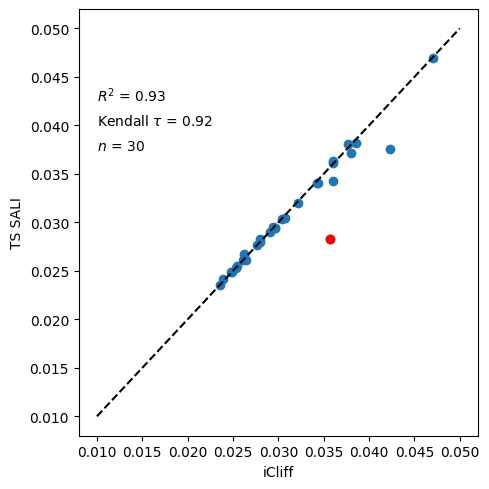

In [30]:
# Read the data
data_ = data[data['fp'] == 'ECFP']

# Plot iCliff vs TS
plt.figure(figsize=(5,5))
plt.scatter(data_['iCliff'], data_['ts_sali_avg'])
plt.plot([0.01, 0.05], [0.01, 0.05], 'k--')

# Change color of the points with an absolute error > 0.005
for i in range(len(data_)):
    if np.abs(data_['iCliff'].values[i] - data_['ts_sali_avg'].values[i]) > 0.005:
        plt.scatter(data_['iCliff'].values[i], data_['ts_sali_avg'].values[i], color='red')

# Add R2, kendall tau, and number of points
plt.text(0.01, 0.0425, f'$R^2$ = {np.round(np.corrcoef(data_["iCliff"], data_["ts_sali_avg"])[0,1]**2, 2)}')
plt.text(0.01, 0.040, f'Kendall $\\tau$ = {np.round(kendalltau(data_["iCliff"], data_["ts_sali_avg"])[0], 2)}')
plt.text(0.01, 0.0375, f'$n$ = {len(data_)}')

plt.xlabel('iCliff')
plt.ylabel('TS SALI')

plt.tight_layout()

plt.savefig('iCliff_vs_TS_SALI.png', dpi=400)
plt.show()


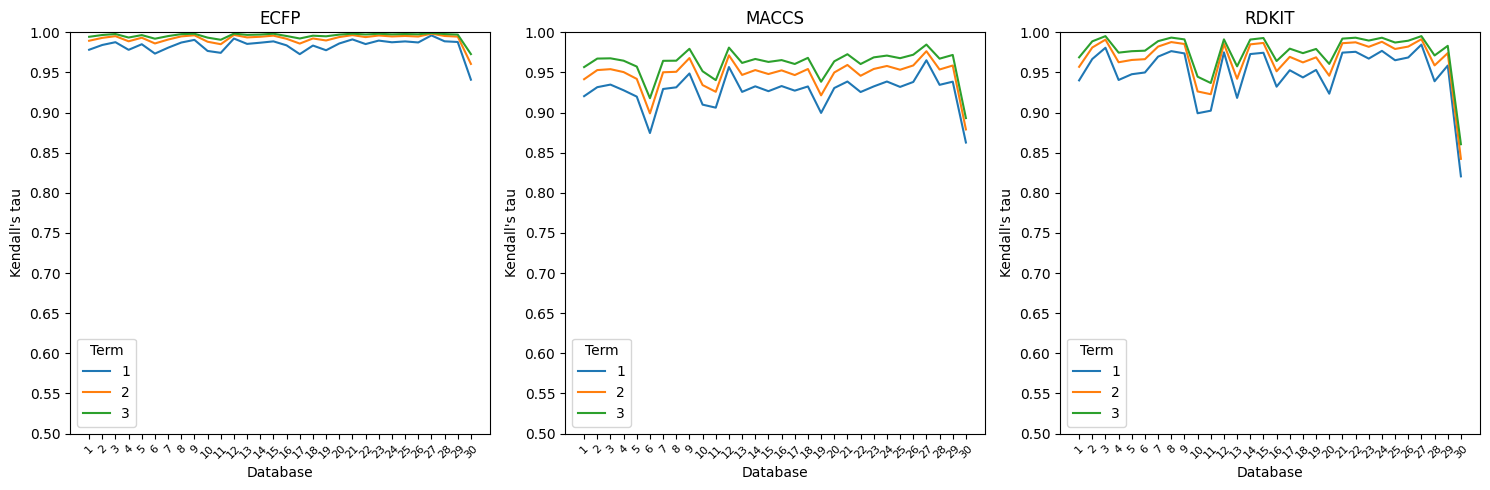

In [32]:
# Plot Kendall's tau for each database by fingerprint
# Read the kendall's tau values

kt = pd.read_csv('kendall_tau.csv')

databases = np.unique(kt['name'].values)
fps = np.unique(kt['fp'].values)

# Create three subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, fp in enumerate(fps):
    ax = axs[i]
    for k in range(1,4):
        ax.plot(range(len(databases)), kt[(kt['fp'] == fp) & (kt['term'] == k)]['kt'], label=k)

    ax.set_title(fp)
    ax.set_xticks(range(len(databases)))
    ax.set_xticklabels(range(1, len(databases) + 1), rotation=45, fontsize=8)
    ax.set_xlabel('Database')
    ax.set_ylabel('Kendall\'s tau')

    ax.set_yticks(np.arange(0.5, 1.1, 0.05))

    # Forcing the y-axis to be between 0 and 1
    ax.set_ylim(0.5, 1)

    ax.legend(title='Term')

plt.tight_layout()
plt.savefig('plots/kendall_tau_SALI_TS_SALI.png', dpi = 400)
plt.show()

In [33]:
database_order = kt[(kt['fp'] == fp) & (kt['term'] == k)]['name'].values

In [34]:
# Save the database order in a csv file, include a column from 1 to 30
pd.DataFrame({'database': database_order, 'order': range(1, 31)}).to_csv('database_order.csv', index=False)

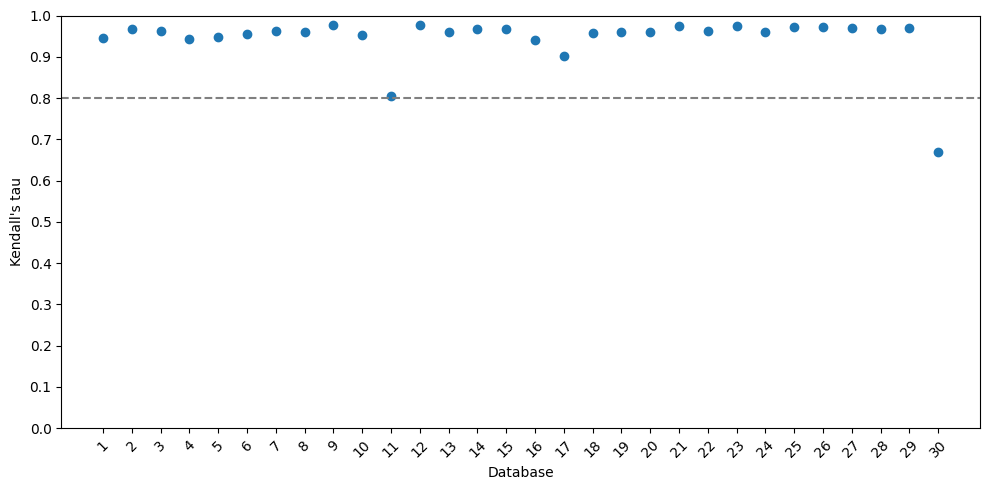

In [40]:
# Plot Kendall's tau for each database by fingerprint
# Read the kendall's tau values

kt = pd.read_csv('kendalls_icliff.csv')

data_points = []

# Resorted
for db in database_order:
    data_ = kt[kt['name'] == db]
    data_points.append(data_['kendalltau'].values[0])

# Create one plot
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(range(len(database_order)), data_points, marker='o')

ax.set_xticks(range(len(database_order)))
ax.set_xticklabels(range(1, len(database_order)+1), rotation=45, fontsize=10)
ax.set_xlabel('Database')
ax.set_ylabel('Kendall\'s tau')

ax.set_yticks(np.arange(0.0, 1.1, 0.10))

# Make a line at y = 0.8
ax.axhline(y=0.8, color='gray', linestyle='--')

# Forcing the y-axis to be between 0 and 1
ax.set_ylim(0.0, 1)

plt.tight_layout()
plt.savefig('plots/kendall_tau_iCliff.png', dpi = 400)
plt.show()


In [22]:
# Read the activity_cliffs.csv file
activity_cliffs = pd.read_csv('activity_cliffs.csv')

for db in database_order:
    data_ = activity_cliffs[activity_cliffs['name'] == db]
    
    # Find the row with the max similarity
    max_sim = data_['similarity'].max()

    # Find the row with the max similarity
    max_sim_row = data_[data_['similarity'] == max_sim]

    # Get the smiles of the two molecules
    smiles = [max_sim_row['smiles_1'].values[0], max_sim_row['smiles_2'].values[0]]

    # Draw the molecules
    img = Draw.MolsToGridImage([Chem.MolFromSmiles(smiles[0]), Chem.MolFromSmiles(smiles[1])], molsPerRow=2, 
                               legends=['Similarity: {:.2f}'.format(max_sim), 'Property diff.: {:.2f}'.format(np.sqrt(max_sim_row['prop_diff_squared'].values[0]))],
                               subImgSize=(200, 200))

    with open(f'plots/AC_{db}.png', 'wb') as f:
        f.write(img.data)

/tmp/ipykernel_4757/2156114616.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(5, 5))


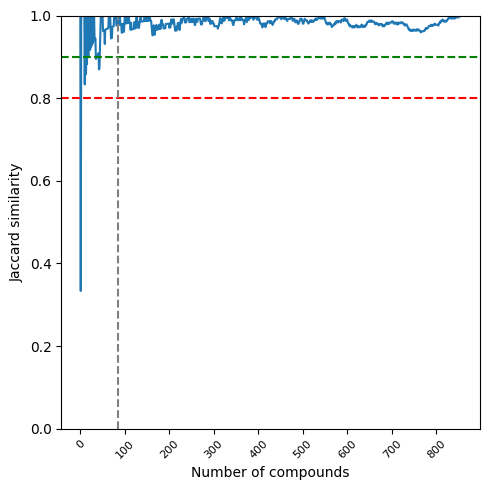

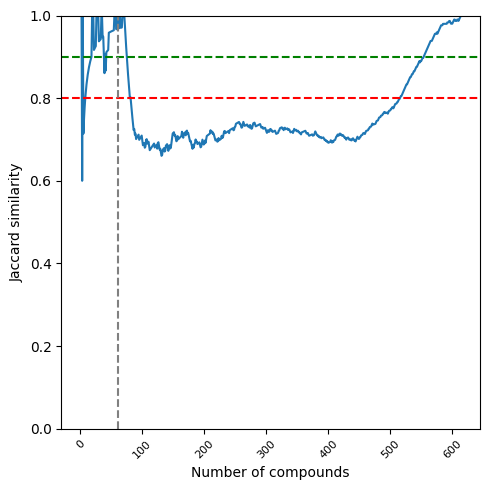

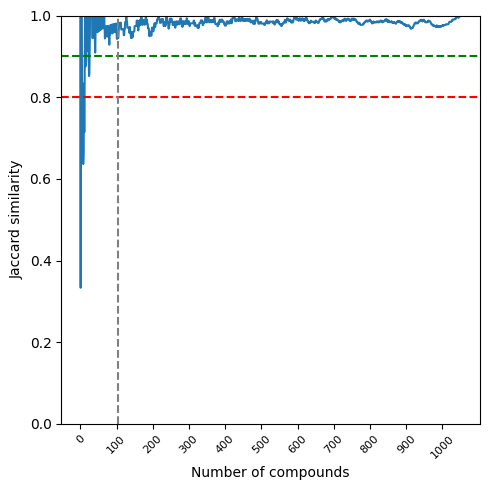

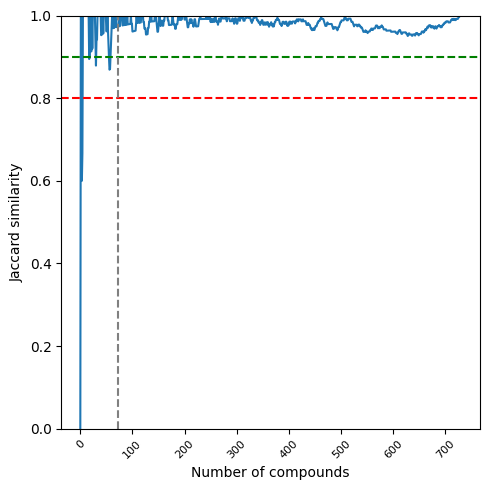

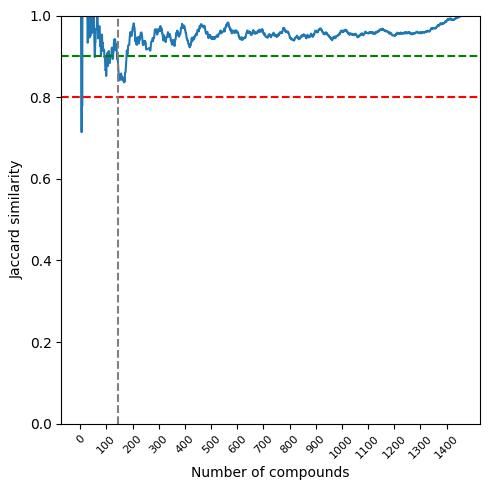

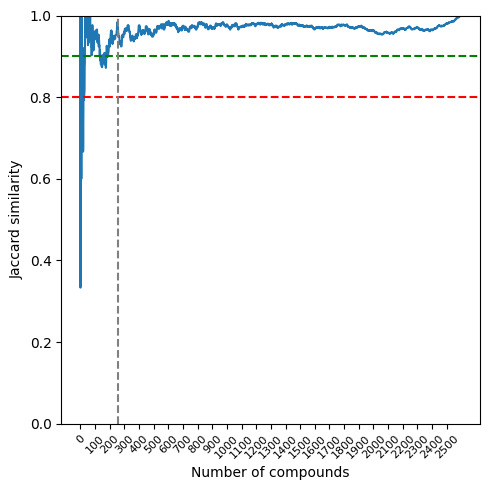

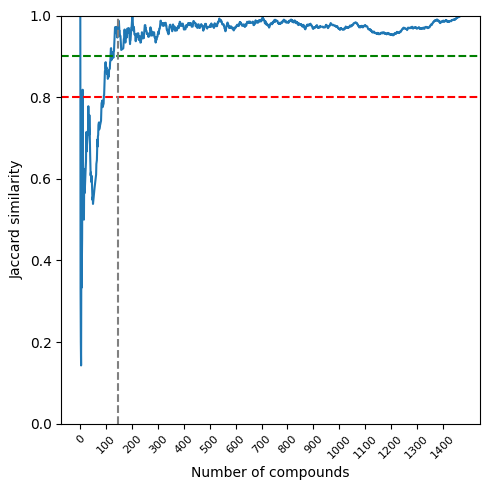

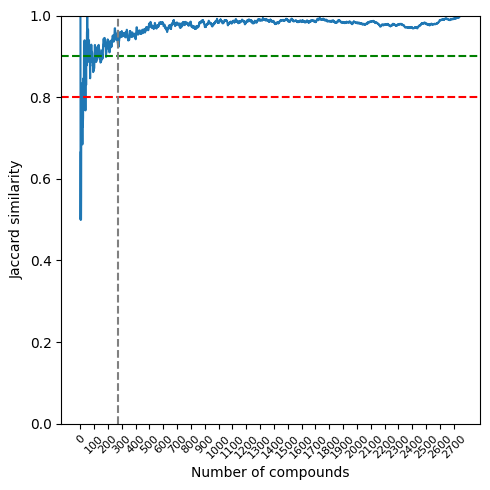

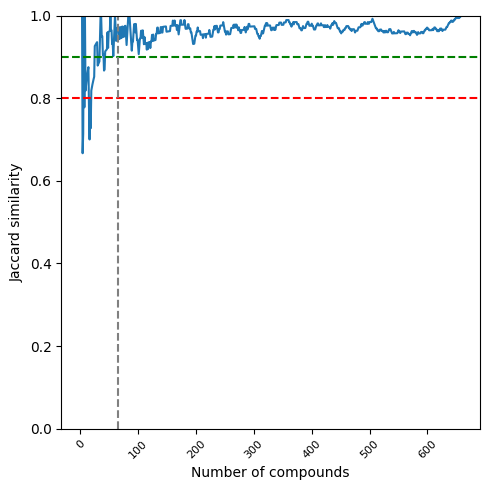

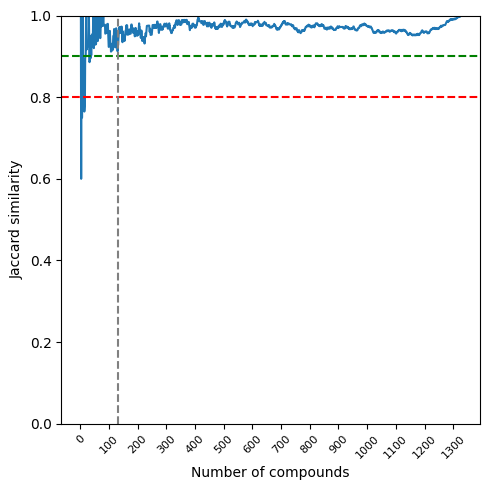

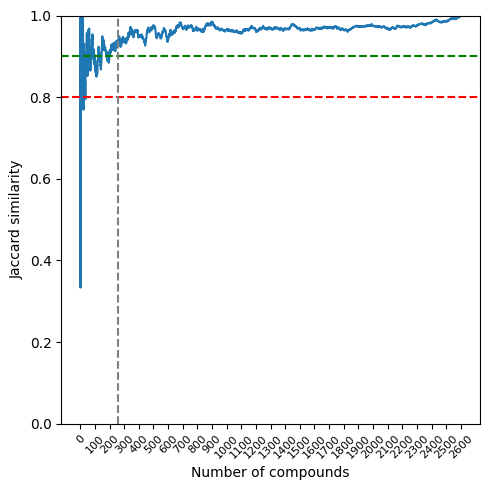

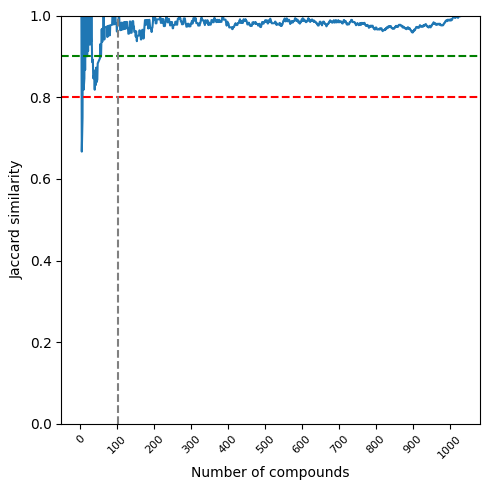

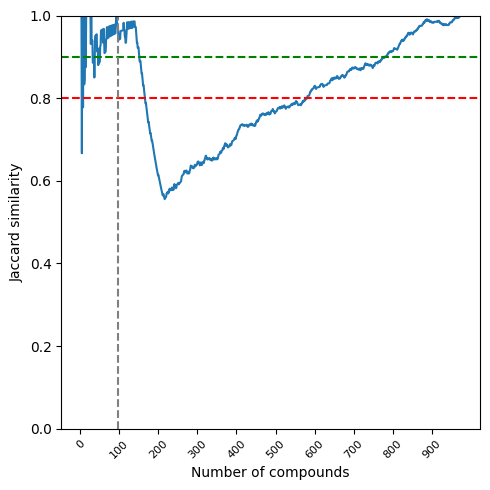

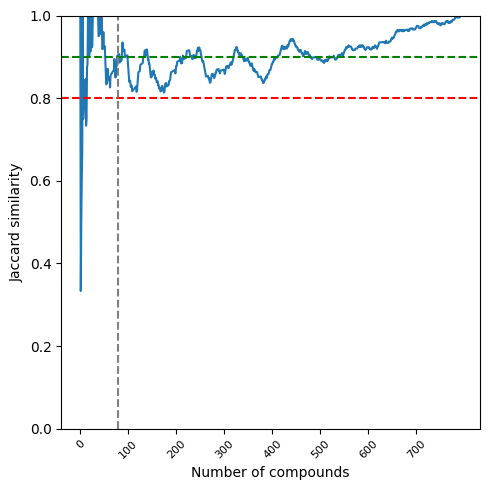

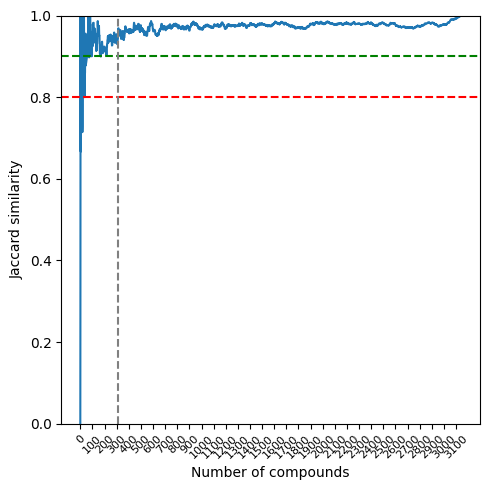

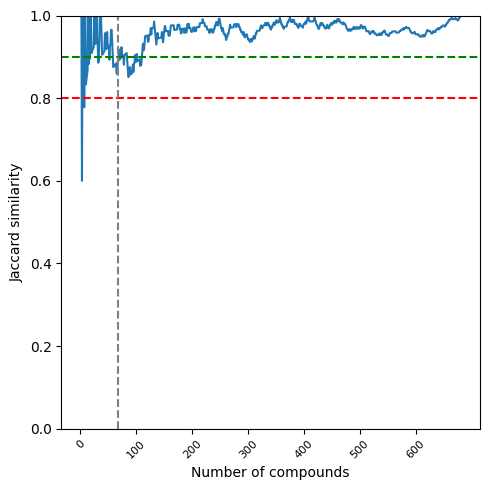

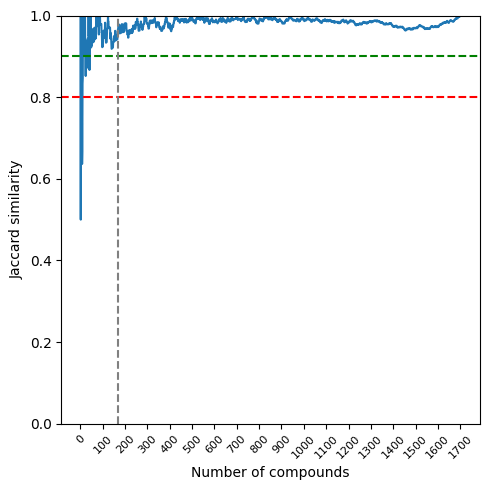

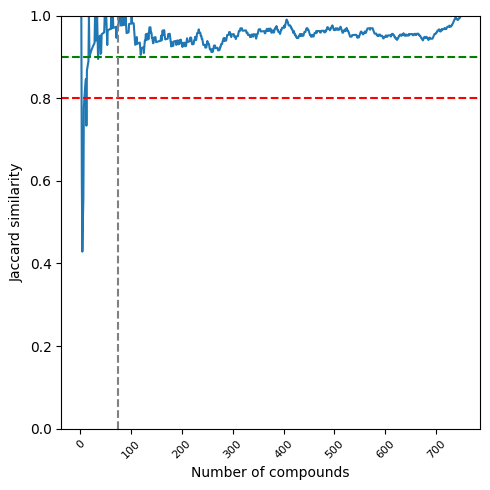

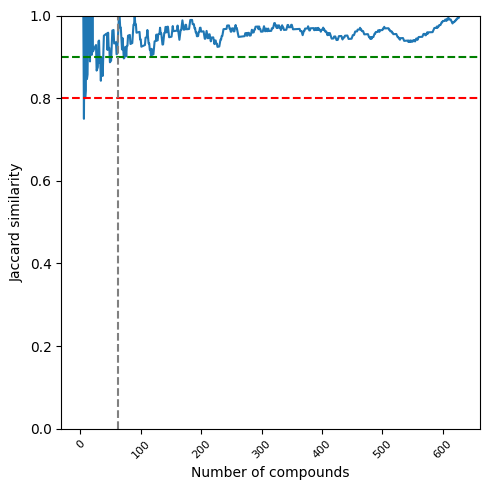

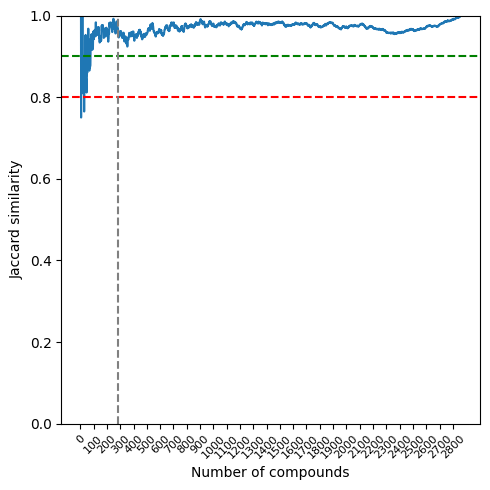

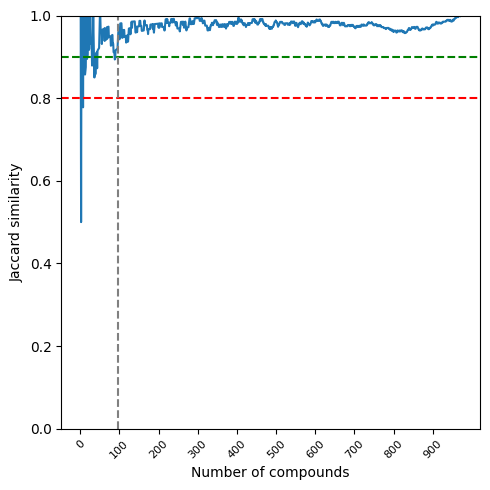

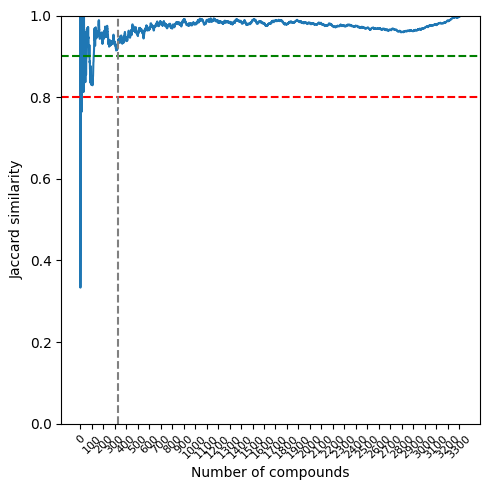

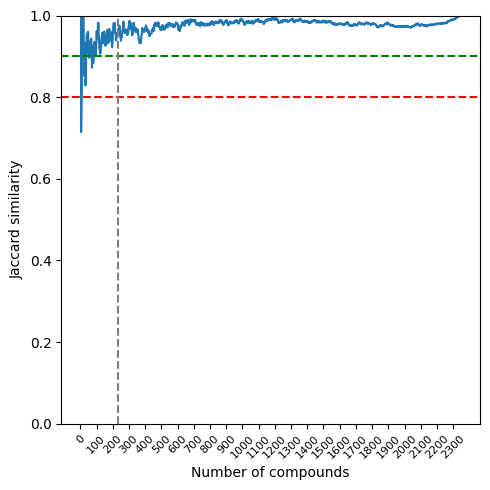

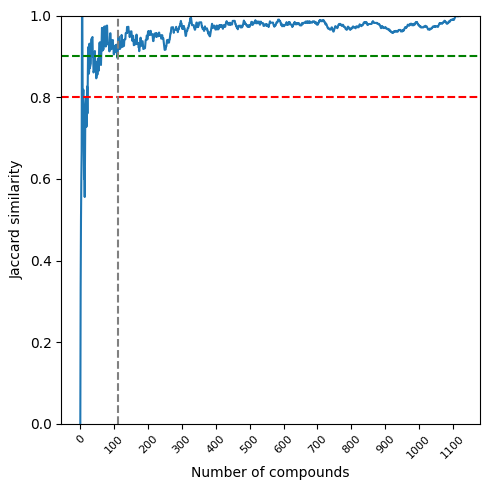

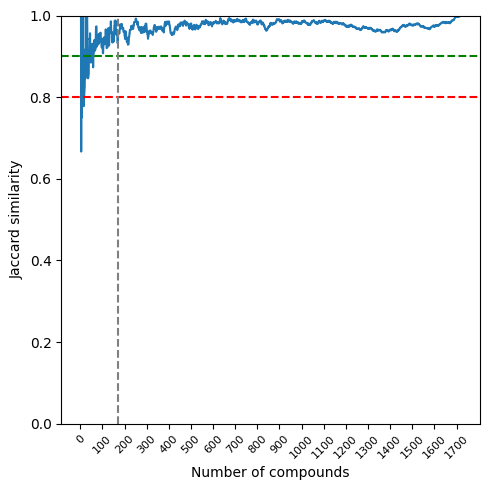

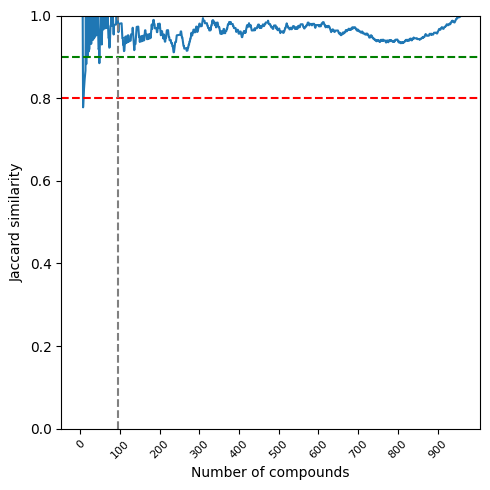

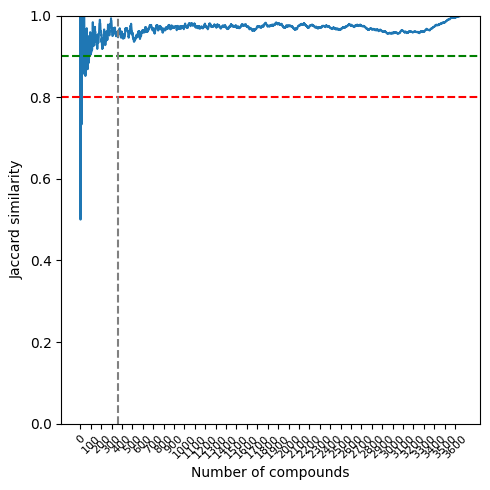

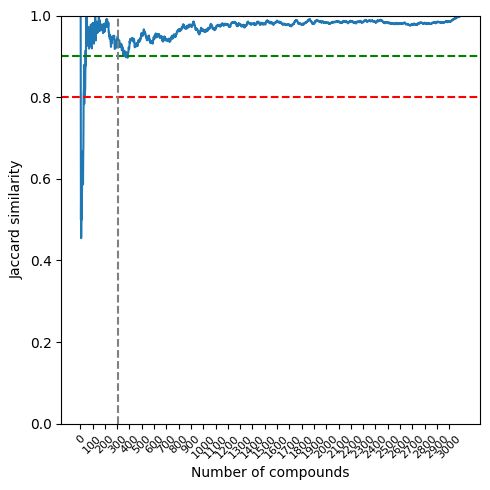

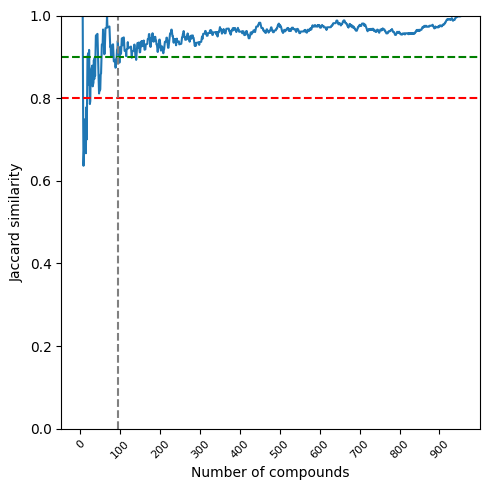

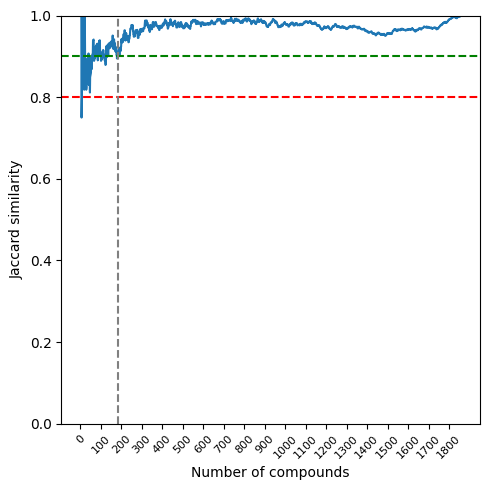

In [43]:
import glob

for file in glob.glob('ts_sali_vs_icliff/*'):
    fig, ax = plt.subplots(figsize=(5, 5))
    data = pd.read_csv(file)

    ax.plot(range(len(data)), data['jaccard'])

    ax.set_xticks(range(0, len(data), 100))
    ax.set_xticklabels(range(0, len(data) + 1, 100), rotation=45, fontsize=8)
    ax.set_xlabel('Number of compounds')

    ax.set_ylabel('Jaccard similarity')

    # Set a straight line at 0.8
    ax.axhline(0.8, color='red', linestyle='--')

    # Set a straight line at 0.9
    ax.axhline(0.9, color='green', linestyle='--')

    # Set a vertical line at the 10% of the dataset
    ax.axvline(len(data) * 0.1, color='gray', linestyle='--')

    ax.set_ylim(0.0, 1)


    plt.tight_layout()
    plt.savefig(file.replace('ts_sali_vs_icliff/', 'plots/').replace('.csv', '.png'))